In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
# create fictitious data set 
simple_life_dataset = pd.DataFrame({'Age':[0, 60], 'Life Expectancy':[90, 30]})
simple_life_dataset.head()


,Age,Life Expectancy
0,0,90
1,60,30


In [4]:
slope, intercept, r_value, p_value, std_err = stats.linregress(simple_life_dataset['Age'],simple_life_dataset['Life Expectancy'])
print('intercept: ', intercept)
print('slope: ', slope)


intercept:  90.0
slope:  -1.0


**Life Expectancy Estimate = Slope * Age + Intercept**


In [7]:
np.ceil(slope * 20 + intercept)

70.0

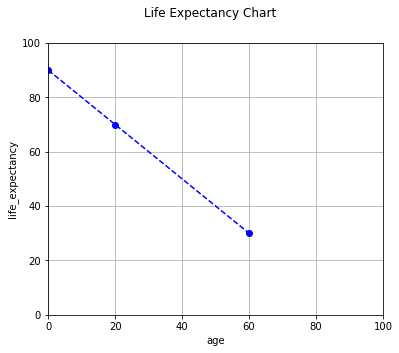

In [8]:
fig, axes = plt.subplots(figsize=(6,5))
x = [0,20,60]
y = [90, 70, 30]
axes.plot(x,y, color='blue', linestyle='--', marker='o')
fig.suptitle('Life Expectancy Chart')
axes.set_xlabel('age')
axes.set_xlim([0,100])
axes.set_ylabel('life_expectancy')
axes.set_ylim([0,100])
plt.grid()
plt.show()


**WHO Mortality Data**
<br>Let’s download real data and save it locally. Then let’s run through the exact same exercise as above:



In [15]:
# load WHO longevity data
# http://apps.who.int/gho/data/node.main.688
who_list = pd.read_csv('http://apps.who.int/gho/athena/data/GHO/WHOSIS_000001,WHOSIS_000015?filter=COUNTRY:*&x-sideaxis=COUNTRY;YEAR&x-topaxis=GHO;SEX&profile=verbose&format=csv')
# save a local copy of the data set for our Flask prototype later on
who_list.to_csv('WHOSIS_000001,WHOSIS_000015.csv')

In [16]:
who_list.head()

,GHO (CODE),GHO (DISPLAY),GHO (URL),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),PUBLISHSTATE (URL),YEAR (CODE),YEAR (DISPLAY),YEAR (URL),REGION (CODE),...,SEX (CODE),SEX (DISPLAY),SEX (URL),Display Value,Numeric,Low,High,StdErr,StdDev,Comments
0,WHOSIS_000015,Life expectancy at age 60 (years),https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,2004,2004,NaN,AFR,...,FMLE,Female,NaN,16.1,16.11904,NaN,NaN,NaN,NaN,NaN
1,WHOSIS_000015,Life expectancy at age 60 (years),https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,2004,2004,NaN,AFR,...,BTSX,Both sexes,NaN,15.3,15.34902,NaN,NaN,NaN,NaN,NaN
2,WHOSIS_000015,Life expectancy at age 60 (years),https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,2007,2007,NaN,AFR,...,MLE,Male,NaN,15.4,15.39649,NaN,NaN,NaN,NaN,NaN
3,WHOSIS_000001,Life expectancy at birth (years),https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,2008,2008,NaN,AFR,...,BTSX,Both sexes,NaN,59.9,59.91484,NaN,NaN,NaN,NaN,NaN
4,WHOSIS_000015,Life expectancy at age 60 (years),https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,2010,2010,NaN,AFR,...,FMLE,Female,NaN,17.7,17.72901,NaN,NaN,NaN,NaN,NaN


In [17]:
# Keep only useful features fix case display of country text
who_list = who_list[['GHO (DISPLAY)', 'YEAR (CODE)' , 'COUNTRY (DISPLAY)', 'SEX (DISPLAY)', 'Numeric']]
who_list['COUNTRY (DISPLAY)'] = [ctry.title() for ctry in who_list['COUNTRY (DISPLAY)'].values]
# print a few rows
who_list[who_list['COUNTRY (DISPLAY)']=='France'].head(10)


,GHO (DISPLAY),YEAR (CODE),COUNTRY (DISPLAY),SEX (DISPLAY),Numeric
221,Life expectancy at birth (years),2015,France,Male,79.82015
222,Life expectancy at birth (years),2002,France,Both sexes,79.51011
223,Life expectancy at birth (years),2013,France,Both sexes,82.11893
627,Life expectancy at birth (years),2009,France,Male,78.04598
628,Life expectancy at birth (years),2012,France,Male,78.83018
629,Life expectancy at birth (years),2011,France,Female,84.82901
1041,Life expectancy at birth (years),2003,France,Female,82.88506
1042,Life expectancy at birth (years),2014,France,Female,85.38569
1043,Life expectancy at birth (years),2005,France,Both sexes,80.28153
1441,Life expectancy at birth (years),2001,France,Male,75.74738


In [19]:
lf_exp_birth_ng =  who_list[(who_list['GHO (DISPLAY)'] == 'Life expectancy at birth (years)') &
        (who_list['COUNTRY (DISPLAY)'] == 'Nigeria')]

lf_exp_birth_ng.head()

,GHO (DISPLAY),YEAR (CODE),COUNTRY (DISPLAY),SEX (DISPLAY),Numeric
1688,Life expectancy at birth (years),2008,Nigeria,Male,51.08654
1689,Life expectancy at birth (years),2010,Nigeria,Female,52.61499
1690,Life expectancy at birth (years),2015,Nigeria,Both sexes,54.78326
2090,Life expectancy at birth (years),2014,Nigeria,Male,53.77731
2091,Life expectancy at birth (years),2013,Nigeria,Female,54.20314


In [23]:
lf_exp_birth_ng.sort_values(by= 'YEAR (CODE)', inplace=True)

c:\users\abuton\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
year_life = lf_exp_birth_ng.set_index('YEAR (CODE)')
year_life

,GHO (DISPLAY),COUNTRY (DISPLAY),SEX (DISPLAY),Numeric
YEAR (CODE),,,,
2000,Life expectancy at birth (years),Nigeria,Both sexes,47.34940
2000,Life expectancy at birth (years),Nigeria,Female,47.79913
2000,Life expectancy at birth (years),Nigeria,Male,46.90524
2001,Life expectancy at birth (years),Nigeria,Female,48.02102
2001,Life expectancy at birth (years),Nigeria,Male,47.18024
2001,Life expectancy at birth (years),Nigeria,Both sexes,47.59838
2002,Life expectancy at birth (years),Nigeria,Both sexes,47.90189
2002,Life expectancy at birth (years),Nigeria,Male,47.52996
2002,Life expectancy at birth (years),Nigeria,Female,48.27586


Text(0, 0.5, 'Life Expectancy')

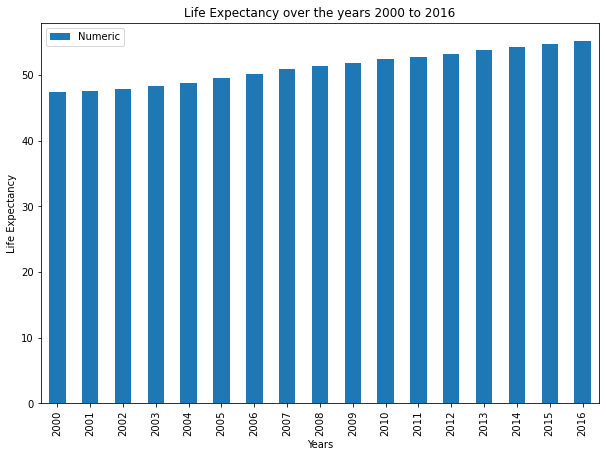

In [33]:
lf_exp_birth_ng.groupby('YEAR (CODE)').mean().plot(kind='bar', figsize=(10,7))
plt.title('Life Expectancy over the years 2000 to 2016')
plt.xlabel('Years')
plt.ylabel('Life Expectancy')

Text(0, 0.5, 'Life Expectancy')

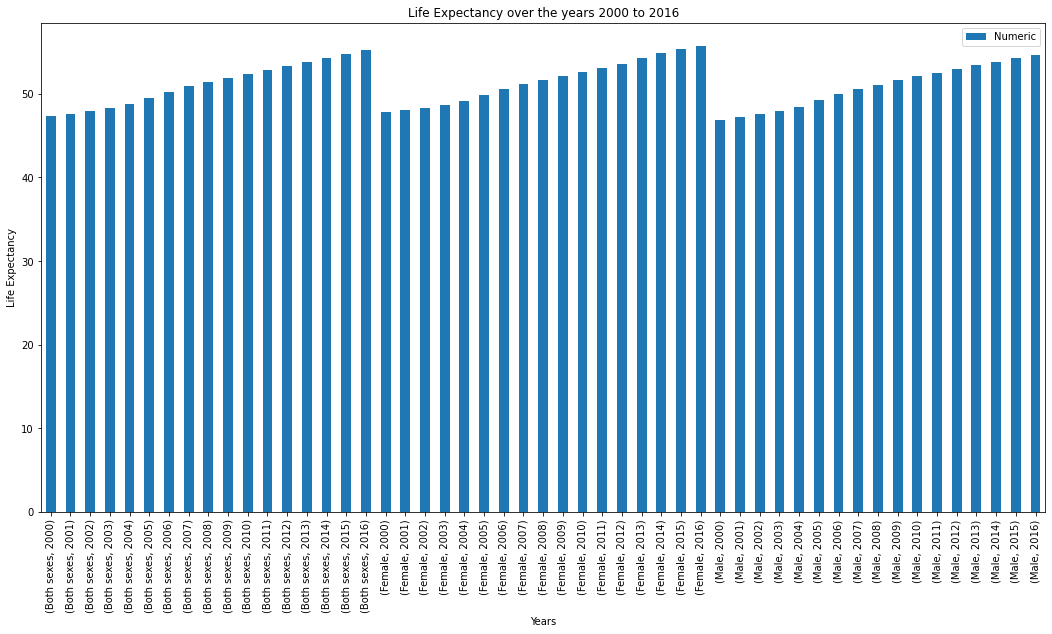

In [34]:
lf_exp_birth_ng.groupby(['SEX (DISPLAY)','YEAR (CODE)']).mean().plot(kind='bar', figsize=(18,9))
plt.title('Life Expectancy over the years 2000 to 2016')
plt.xlabel('Years')
plt.ylabel('Life Expectancy')

10088    Life expectancy at birth (years)
10085    Life expectancy at birth (years)
2920     Life expectancy at birth (years)
8474     Life expectancy at birth (years)
8471     Life expectancy at birth (years)
2499     Life expectancy at birth (years)
8871     Life expectancy at birth (years)
17642    Life expectancy at birth (years)
2922     Life expectancy at birth (years)
8472     Life expectancy at birth (years)
8868     Life expectancy at birth (years)
17226    Life expectancy at birth (years)
8869     Life expectancy at birth (years)
8864     Life expectancy at birth (years)
2500     Life expectancy at birth (years)
8865     Life expectancy at birth (years)
2498     Life expectancy at birth (years)
8872     Life expectancy at birth (years)
8870     Life expectancy at birth (years)
8476     Life expectancy at birth (years)
8866     Life expectancy at birth (years)
10086    Life expectancy at birth (years)
10089    Life expectancy at birth (years)
8867     Life expectancy at birth 

In [41]:
country = 'Nigeria'
sex = 'Male'
# pull latest entries for birth and 60 years for a country and gender
sub_set = who_list[who_list['COUNTRY (DISPLAY)'].str.startswith(country, na=False)]
sub_set = sub_set[sub_set['SEX (DISPLAY)'] == sex]
# sort by year in descending order to work with the latest read
sub_set = sub_set.sort_values('YEAR (CODE)', ascending=False)
sub_set_birth = sub_set[sub_set['GHO (DISPLAY)'] == 'Life expectancy at birth (years)']
sub_set_60 = sub_set[sub_set['GHO (DISPLAY)'] == 'Life expectancy at age 60 (years)']
print('sub_set_birth:')
print(sub_set_birth.head(5))
print('sub_set_60:')
print(sub_set_60.head(5))

sub_set_birth:
                          GHO (DISPLAY)  YEAR (CODE) COUNTRY (DISPLAY)  \
18046  Life expectancy at birth (years)         2016           Nigeria   
9684   Life expectancy at birth (years)         2015           Nigeria   
2090   Life expectancy at birth (years)         2014           Nigeria   
9683   Life expectancy at birth (years)         2013           Nigeria   
9682   Life expectancy at birth (years)         2012           Nigeria   

      SEX (DISPLAY)   Numeric  
18046          Male  54.67828  
9684           Male  54.26228  
2090           Male  53.77731  
9683           Male  53.40731  
9682           Male  52.96281  
sub_set_60:
                           GHO (DISPLAY)  YEAR (CODE) COUNTRY (DISPLAY)  \
4015   Life expectancy at age 60 (years)         2016           Nigeria   
16884  Life expectancy at age 60 (years)         2015           Nigeria   
16404  Life expectancy at age 60 (years)         2014           Nigeria   
3620   Life expectancy at age 60 (ye

In [42]:
sub_set_birth['Numeric'].values

array([54.67828, 54.26228, 53.77731, 53.40731, 52.96281, 52.5155 ,
       52.10809, 51.63389, 51.08654, 50.61185, 49.94127, 49.22105,
       48.45422, 47.91391, 47.52996, 47.18024, 46.90524])

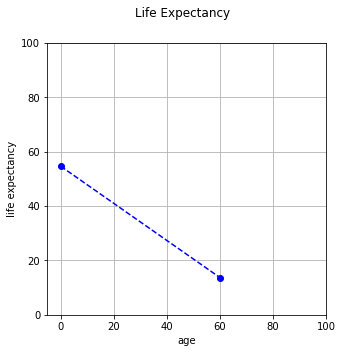

In [43]:
# create data set with both points as shown in first example
lf_at_birth = sub_set_birth['Numeric'].values[0]
lf_at_60 = sub_set_60['Numeric'].values[0]
# let's organize our data and plot
age = [0,60]
life_expectancy = [lf_at_birth, lf_at_60]
fig, axes = plt.subplots(figsize=(5,5))
x = age
y = life_expectancy
axes.plot(x,y, color='blue', linestyle='--', marker='o')
fig.suptitle('Life Expectancy')
axes.set_xlabel('age')
axes.set_xlim([-5,100])
axes.set_ylabel('life expectancy')
axes.set_ylim([0,100])
plt.grid()
plt.show()

In [44]:
# model 
slope, intercept, r_value, p_value, std_err = stats.linregress(age, life_expectancy)
print('intercept: ', intercept)
print('slope: ', slope)

# predict life expectancy for an 49-year-old male in the Nigeria:
np.ceil(slope * 49 + intercept)

intercept:  54.67828
slope:  -0.6834653333333334


22.0

### Abstracting the Logic into a Clean Function

In [49]:
def get_life_expectancy(age, country, sex):
    # pull latest entries for birth and 60 years
    sub_set = who_list[who_list['COUNTRY (DISPLAY)'].str.startswith(country, na=False)]
    sub_set = sub_set[sub_set['SEX (DISPLAY)'] == sex]
    sub_set = sub_set.sort_values('YEAR (CODE)', ascending=False)
    sub_set_birth = sub_set[sub_set['GHO (DISPLAY)'] == 'Life expectancy at birth (years)']
    sub_set_60 = sub_set[sub_set['GHO (DISPLAY)'] == 'Life expectancy at age 60 (years)']

    # not all combinations exsits so check that we have data for both
    if len(sub_set_birth['Numeric']) > 0 and len(sub_set_60['Numeric']) > 0:
        # create data set with both points as shown in first example
        lf_at_birth = sub_set_birth['Numeric'].values[0]
        lf_at_60 = sub_set_60['Numeric'].values[0]

        # model
        slope, intercept, r_value, p_value, std_err = stats.linregress([0,60],[lf_at_birth, lf_at_60])

        # predict for the age variable
        return(np.ceil(slope * age + intercept))
    else:
        return 'Data Not Represented'

In [50]:
list(set(who_list['COUNTRY (DISPLAY)']))[0:10]

['United Arab Emirates',
 'Argentina',
 'Costa Rica',
 'Haiti',
 'Lebanon',
 'Republic Of North Macedonia',
 'Belarus',
 'Norway',
 'Pakistan',
 'Peru']

In [57]:
# test the function out using a 22-year-old Japanese female:
get_life_expectancy(22, 'Japan', 'Female')


66.0